# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [12]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib.pyplot


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
   

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])


The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

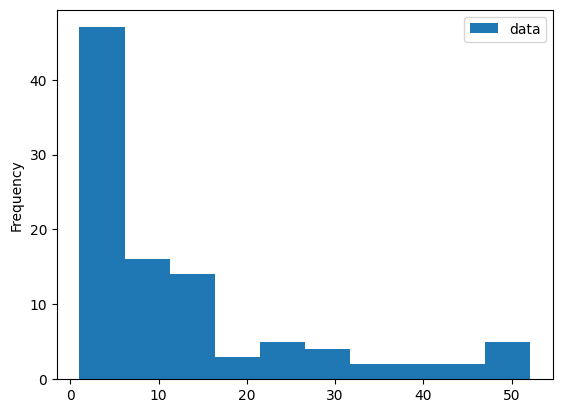

In [14]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

  "A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices." 

##### Histogram: 1st choice
### PROS:  
    great visual on the pharmacys sales on lower costing drugs (under $15) More than half of their sales are under the $15 mark.  
    also shows the difference in price that the administrator wanted to know 
    not many drugs are sold over $50 
### CONS:  
    its difficult to see the exact prices and exact difference of price  
    I would add lines to the boxes for this and possible figures for frequency on top of each box  




<Axes: >

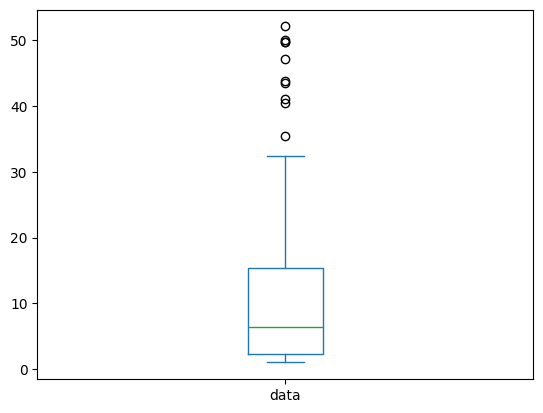

In [15]:
df.plot.box()

##### Box and Whisker: 2nd Choice
### PROS:  
    decent visual that the more expensive drugs are outliers in the plot.  
    the box is clearly between $5-15 for the average cost of drugs bought as this pharmacy
    the quantiles are easy to see

### CONS:  
    frequency of purchases is hard to visualize.  Therefore I think the question that the adminitrator is asking is harder to visualize an answer. You would have to provide actual numbers     
    

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

In [16]:
storytelling = pd.DataFrame({"Category":['Cat 1', 'Cat 2', 'Cat 3', 'Cat 4', 'Cat 5'], 
                             "A": [5, 4, 7, 5, 2], 
                             "B": [3, 6, 3, 7, 2]})
storytelling

,Category,A,B
0,Cat 1,5,3
1,Cat 2,4,6
2,Cat 3,7,3
3,Cat 4,5,7
4,Cat 5,2,2


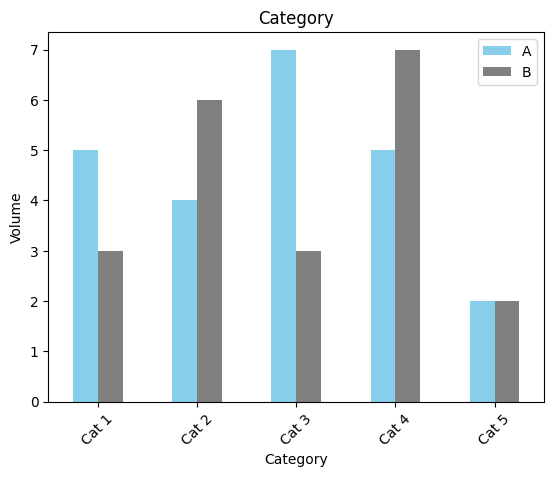

In [21]:
storytelling.set_index("Category").plot(kind="bar", title="Category", color=["skyblue", "gray"])
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.show()